<a href="https://colab.research.google.com/github/bru-or/mydailystudies/blob/main/Curso_01_DS_Explorando_e_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#AULA 01 - Conhecendo os dados
import pandas as pd

In [2]:
notas = pd.read_csv('/content/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas.shape #Retorna nº de linhas e colunas

(100836, 4)

In [4]:
notas.columns = ["User_ID", "Filme_ID", "Nota", "Momento"]
notas.head()

,User_ID,Filme_ID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["Nota"]

,Nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


In [6]:
notas.head()

,User_ID,Filme_ID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas["Nota"] #Quero mostrar só a coluna Nota (deixa de ser um data.frame para ser um data.series)

,Nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


In [8]:
notas["Nota"].mean() #Mostra a média das notas

3.501556983616962

In [9]:
notas["Nota"].value_counts() #Mostra quantidade de cada valor da coluna

,count
Nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


<Axes: >

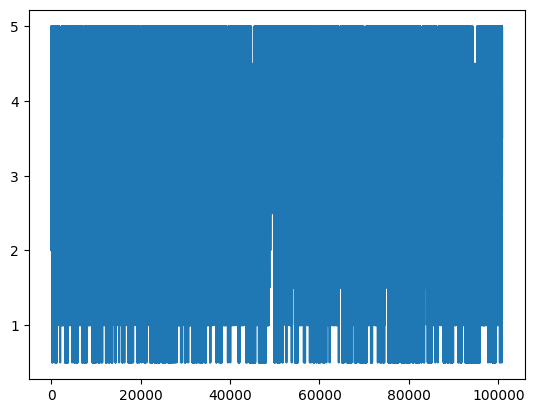

In [10]:
notas["Nota"].plot() #Faz um gráfico esquisito (dado conforme aparece)

<Axes: ylabel='Frequency'>

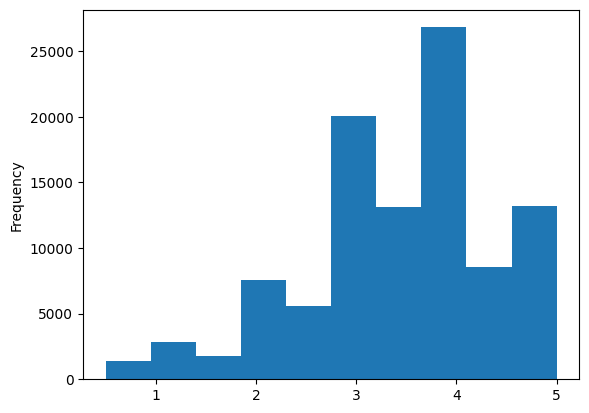

In [11]:
notas["Nota"].plot(kind='hist') #histograma
#10 buckets = pacotes

In [12]:
notas["Nota"].median()

3.5

In [13]:
mediana = notas["Nota"].median()
media = notas["Nota"].mean()
print(f"Mediana é {mediana}.")
print(f"Média é {media}.")

Mediana é 3.5.
Média é 3.501556983616962.


In [14]:
notas["Nota"].describe() #leituras do dado/média... 50% divide no meio

,Nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='Nota'>

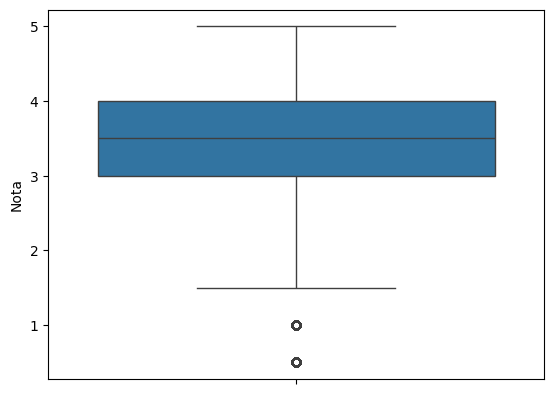

In [15]:
import seaborn as sns #biblioteca q faz o boxplot
sns.boxplot(notas["Nota"]) #Pedindo o boxplot só da coluna de notas

In [16]:
#AULA 02 - Analisando os dados
filmes = pd.read_csv("/content/movies.csv")
filmes.columns = ["ID", "Título", "Gêneros"]
filmes.head()

,ID,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
notas.head()

,User_ID,Filme_ID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
notas.query("Filme_ID==1")["Nota"].mean() #média do Filme Toy Story

3.9209302325581397

In [19]:
notas.query("Filme_ID==2")["Nota"].mean() #média do filme Jumanji

3.4318181818181817

In [20]:
#Fazer a média de todos os filmes (por filme) - agrupar
medias_por_filme = notas.groupby("Filme_ID")["Nota"].mean() #colcoar em uma nova variável para ficar mais simples
medias_por_filme.head()

,Nota
Filme_ID,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

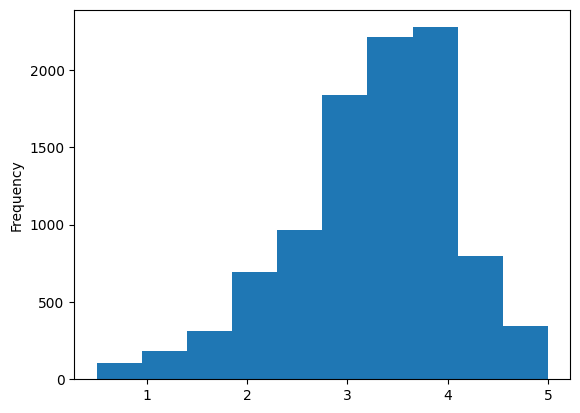

In [21]:
medias_por_filme.plot(kind="hist") #Fala sobre o comportamento dos filmes (o gráfico anterior falava sobre as notas que as pessoas dão.)

<Axes: ylabel='Nota'>

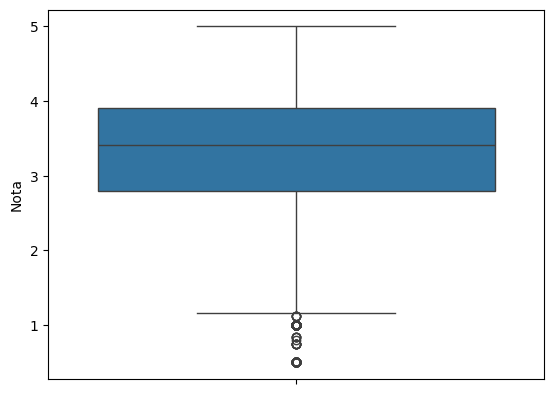

In [22]:
sns.boxplot(medias_por_filme)

In [23]:
medias_por_filme.describe()

,Nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Historgama das médias dos filmes')

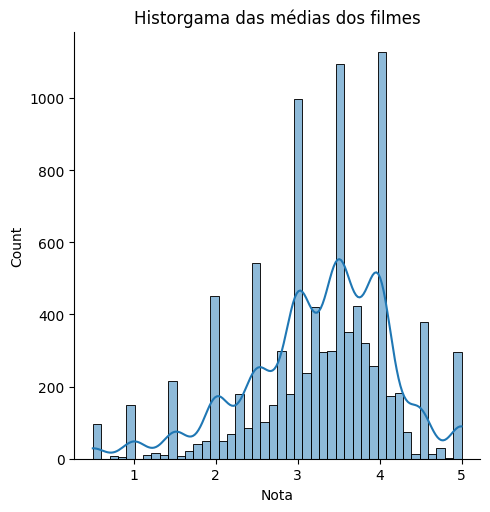

In [24]:
import matplotlib.pyplot as plt
sns.displot(medias_por_filme, kde=True)
plt.title("Historgama das médias dos filmes") #dar o nome do gráfico, colocar sempre depois
#muitos buckets = pacotes em comparação com o pandas (tem uma fórmula padrão para quantos pacotes ele vai fazer)
#kde=True faz uma reta que tenta acompanhar a média

In [25]:
#miniteste durante a aula 02
vendas = pd.read_csv("/content/serenatto_2sem_2023.csv")
vendas.head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


In [26]:
somatorio = vendas.query("produto == 'Ratatouille'")["valor"].sum()
frequencia = vendas.query("produto == 'Ratatouille'")["metodo_pagamento"].value_counts()
print(f"O total de vendas de Ratatouille é de R${somatorio}")
print(f"\nOs métodos de pagamentos foram: \n{frequencia}")

O total de vendas de Ratatouille é de R$323.0

Os métodos de pagamentos foram: 
metodo_pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64


In [27]:
#miniatividade2 durante a aula 02
vendas.query("produto == 'Tiramisù'").head()

,id,data,produto,valor,metodo_pagamento
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
15,2735,2023-07-06,Tiramisù,10.0,Cartão de Crédito
30,2750,2023-07-07,Tiramisù,10.0,Cartão de Débito
31,2751,2023-07-07,Tiramisù,10.0,Cartão de Débito


In [28]:
vendas.query('produto == "Tiramisù" and valor > 5 and metodo_pagamento != "Cartão de Crédito" ').head()

,id,data,produto,valor,metodo_pagamento
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
30,2750,2023-07-07,Tiramisù,10.0,Cartão de Débito
31,2751,2023-07-07,Tiramisù,10.0,Cartão de Débito
39,2759,2023-07-10,Tiramisù,10.0,Dinheiro
46,2766,2023-07-10,Tiramisù,10.0,Dinheiro


In [29]:
# Definindo uma variável externa com o "in @". Vou querer q ele selecione os nomes dos produtos que estão no meu novo df produtos
produtos = ['Café au lait', 'Espresso', 'Cappuccino']
vendas.query('produto in @produtos and metodo_pagamento == "PIX" ').head()

,id,data,produto,valor,metodo_pagamento
9,2729,2023-07-04,Espresso,2.5,PIX
42,2762,2023-07-10,Café au lait,4.0,PIX
64,2784,2023-07-14,Espresso,2.5,PIX
76,2796,2023-07-16,Café au lait,4.0,PIX
77,2797,2023-07-16,Café au lait,4.0,PIX


In [30]:
#AULA 03 - Entendendo os tipos de variáveis
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


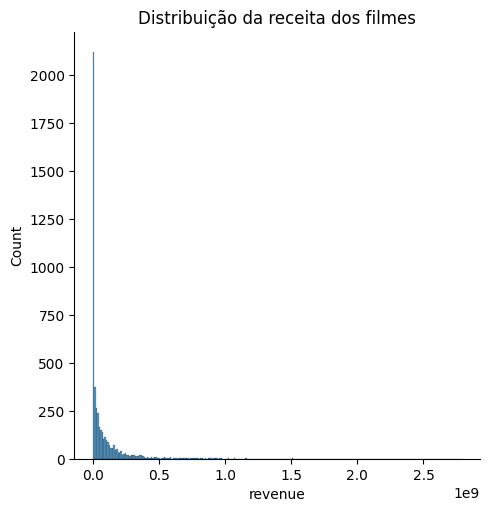

In [31]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show() #Mostrar só o gráfico

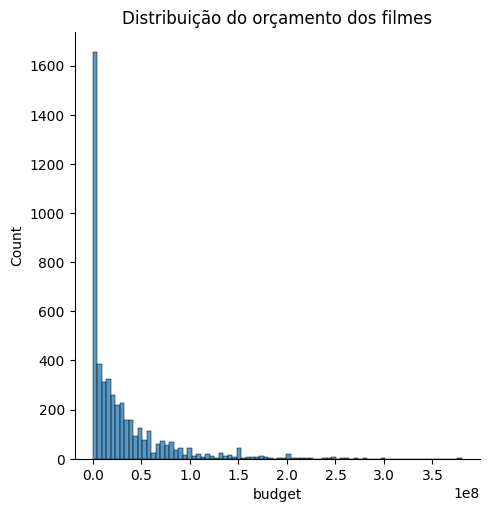

In [32]:
# prompt: gráfico de distribuição de orçamento dos filmes (budget)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Plotando o histograma da coluna 'budget'
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [33]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [34]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [35]:
tmdb.query("revenue < 500") #Revenue = 0 == Faturamento não está registrado

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


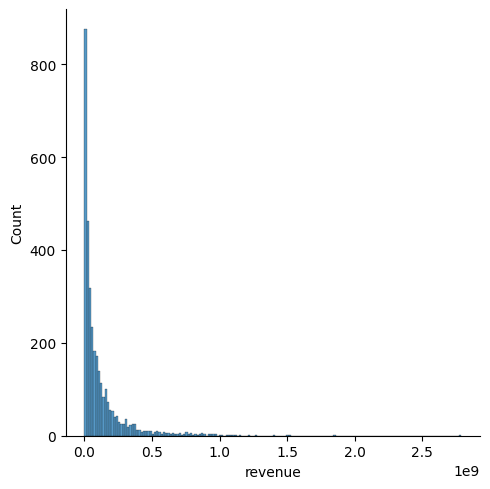

In [36]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"]) #Somente dos filmes que tem dados coletados

In [37]:
tmdb["original_language"].unique() #quais línguas estão cadastrada

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [38]:
#moda = qual nota/líguam que mais aparece
#nota => variável categórica = escolha dentro de um conjunto = Se fala de moda
#budget (orçamento) => quantitativa contínua (tem uma ordem) = Se fala de média
#quantidade de votos => inteira (não pode dar número quadrado) = Não se fala de média nesse caso, e sim mediana
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


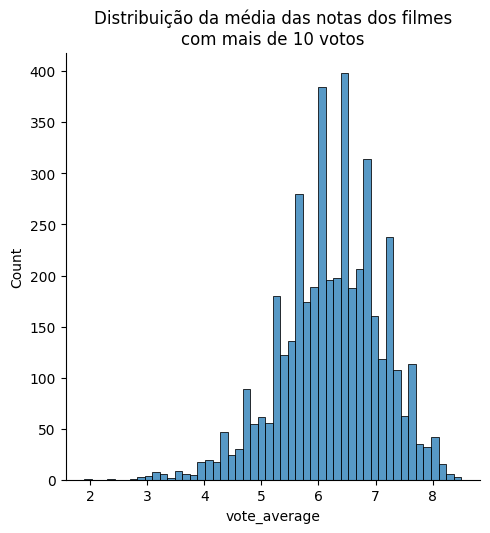

In [39]:
#tarefinha dentro da aula - Como podemos filtrar os dados para gerarmos um visual com a distribuição da média das notas do TMDB (vote_average) em que o número de votos (vote_count) seja maior que 10?
media_notas = tmdb.query("vote_count > 10")
sns.displot(media_notas["vote_average"])
plt.title("Distribuição da média das notas dos filmes\ncom mais de 10 votos")
plt.show()

In [40]:
#AULA 04 - Visualizando os dados
#coluna dos valores tem um índice que nesse caso são os idiomas
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [41]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [42]:
#JEITO DIFÍCIL - Como fazer gráfico de variável categórica - Na mão:
#transformando a série (língua) do DataFrame (tmdb) em uma nova tabela, com o índice anterior sendo uma coluna e a quantidade de vezes que ela aparece como uma outra coluna.
#Faço isso para poder plotar esses valores.
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

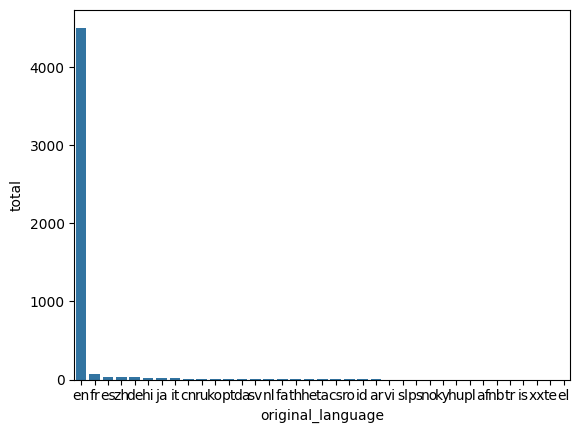

In [43]:
#Que tipo de gráfico quero? Talvez um de barras seja melhor para visualizar
sns.barplot(data = contagem_de_lingua, x="original_language", y="total")

<Axes: xlabel='original_language', ylabel='count'>

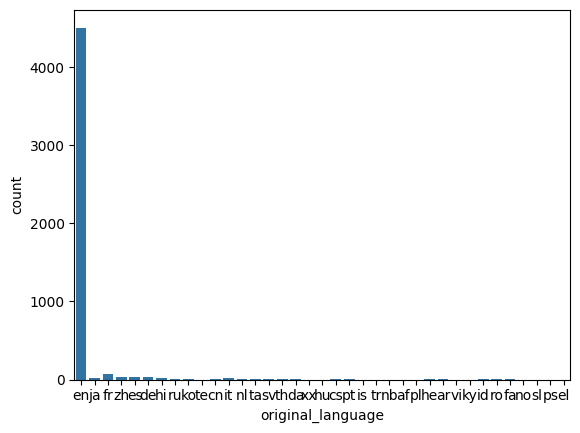

In [44]:
#JEITO FÁCIL - Como fazer gráfico de variável categórica - Com o seaborn:
sns.countplot(data=tmdb, x="original_language")

<Axes: ylabel='total'>

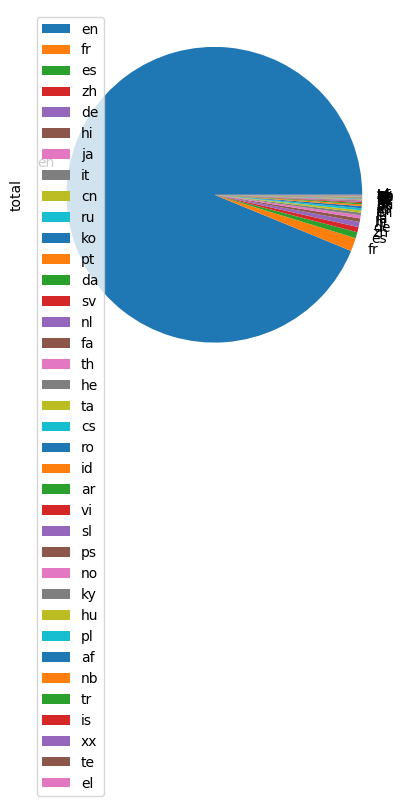

In [45]:
#show de horror gráfico de pizza/torta
contagem_de_lingua.plot(kind="pie",y="total", labels=contagem_de_lingua["original_language"])

In [46]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum() #somar os valores das línguas
total_de_ingles = total_por_lingua.loc["en"] #quando quero pegar só o valor total de uma variável
total_do_resto = total_geral - total_de_ingles
print(f"Geral: {total_geral}, Só inglês: {total_de_ingles}, Demais línguas: {total_do_resto}")

Geral: 4803, Só inglês: 4505, Demais línguas: 298


In [47]:
dados = {
    "lingua" : ["Inglês", "Outros"],
    "total": [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,Inglês,4505
1,Outros,298


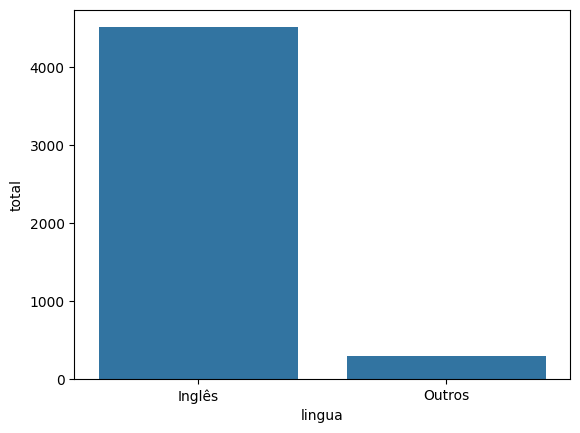

In [48]:
sns.barplot(data=dados, x="lingua", y="total")
plt.show() #mensagem clara do quanto inglês tem mais do que os outros

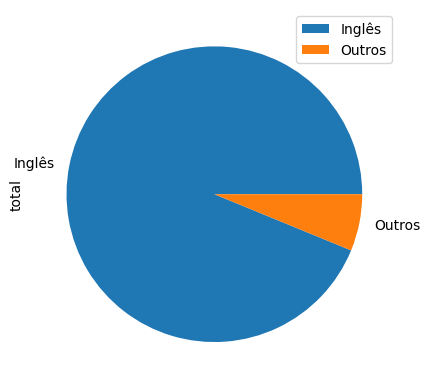

In [49]:
dados.plot(kind="pie", x="lingua", y="total", labels=dados["lingua"])
plt.show() #só é bom em casos de dados binários/dicotômicos. Ex: Homem/mulher, sim/não.

In [50]:
#Tabela das demais línguas
total_demais_linguas = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_demais_linguas.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


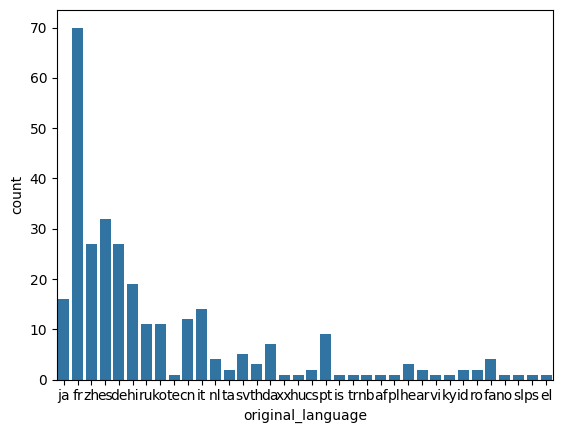

In [51]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")
plt.show()

4803 4505 298


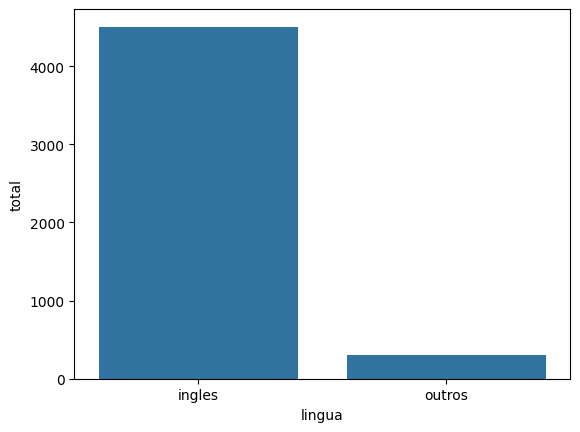

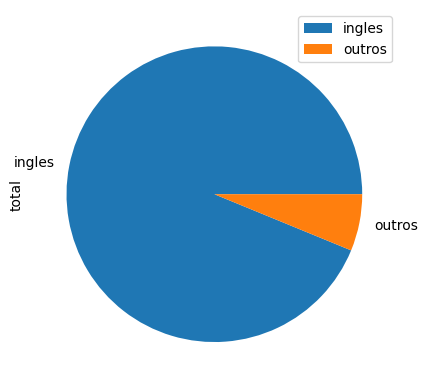

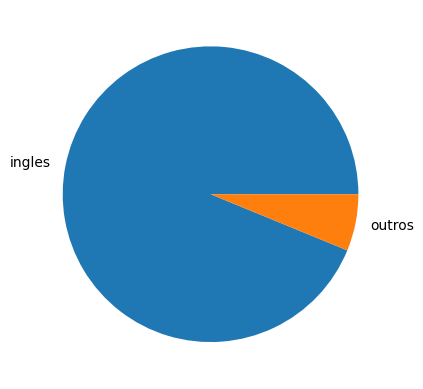

In [52]:
#Tarefinha dentro da aula - Analisando essas visualizações e lembrando dos conhecimentos adquiridos em aula, como podemos gerar um gráfico de pizza?
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados
sns.barplot(x="lingua", y="total", data = dados)

#só colcoar assim:
dados.plot(kind="pie", x="lingua", y="total", labels=dados["lingua"])
plt.show()
#ou com comando direto do Matplotlib
plt.pie(dados["total"], labels=dados["lingua"])
plt.show()

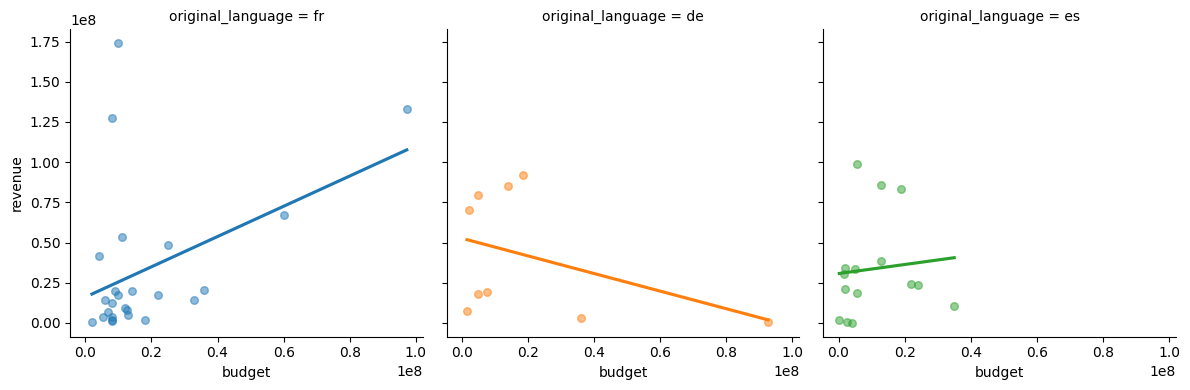

In [53]:
#AULA 05 - Ajustando os visuais
#exemplo do uso do seaborn na aula:
import pandas as pd
import seaborn as sns

# Importando a base de dados
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})
plt.show()

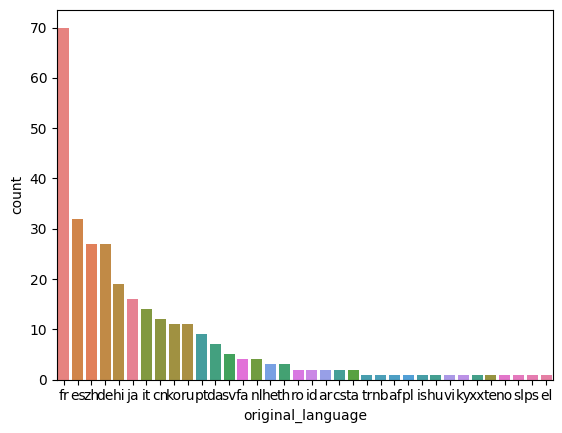

In [54]:
#ordenando o gráfico das outras línguas / uso o DF que criei com as demais línguas
sns.countplot(data=tmdb.query("original_language != 'en'"), order=total_demais_linguas.index, hue="original_language" ,x="original_language")
plt.show()

In [55]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [56]:
#Tabela com valores relativos:
total_demais_linguas = tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)
total_demais_linguas.head()

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758


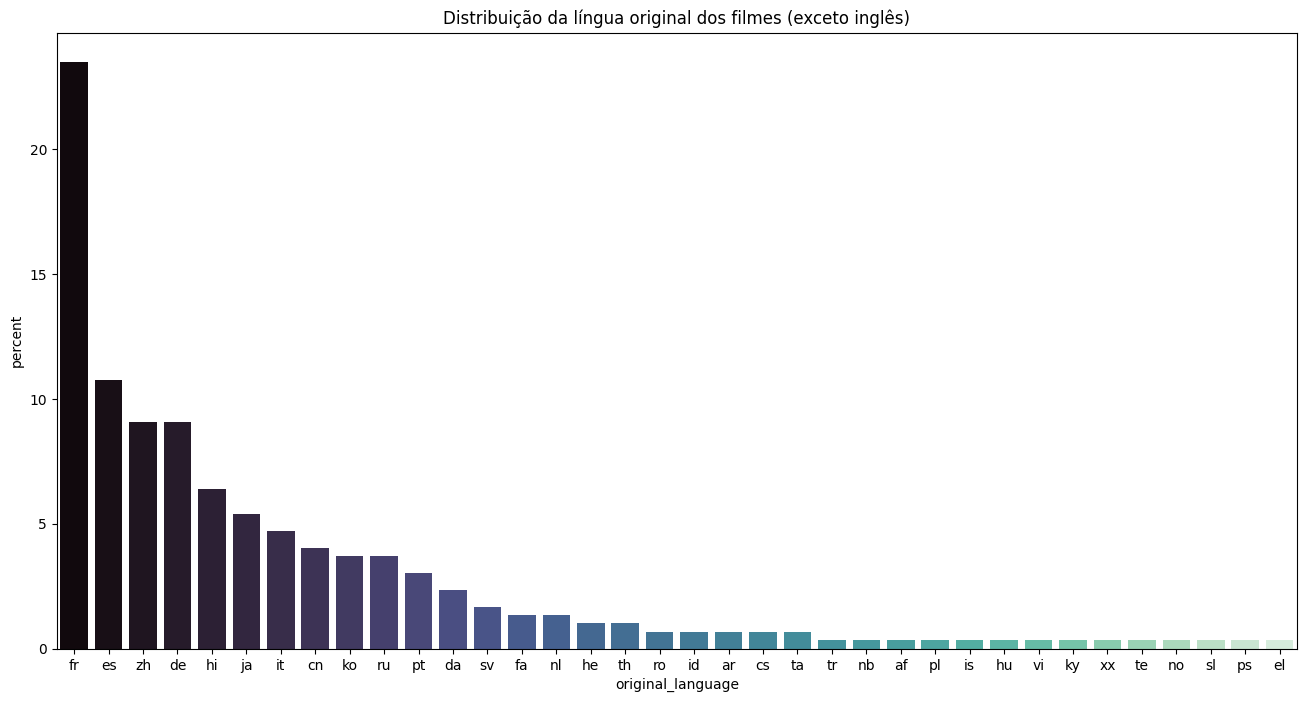

In [57]:
plt.figure(figsize=(16,8))  #Determinar o tamanho da figura
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_demais_linguas.index, #ordem das colunas para a plotagem
              palette="mako", #cor
              hue="original_language", #qual coluna define a cor (agrupamento)
              hue_order=total_demais_linguas.index, #ordem das cores seguindo a ordem da plotagem
              stat="percent", #colocar o dado em percentual
              x="original_language")
plt.title("Distribuição da língua original dos filmes (exceto inglês)")
plt.show()

In [58]:
#AULA 06 - Estatística dos dados
#Medidas de tendência central e desvio padrão
filmes.head(2) #2 é um parâmetro se eu quiser menos q as 5 primeiras

,ID,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [63]:
notas_toy_story = notas.query("Filme_ID==1")["Nota"]
notas_jumanji = notas.query("Filme_ID==2")["Nota"]

media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

print(media_toy_story, media_jumanji) #média é um resumo, mas preciso saber a distribuição dos dados.

3.9209302325581397 3.4318181818181817


In [64]:
#mediana
mediana_toy_story = notas_toy_story.median()
mediana_jumanji = notas_jumanji.median()
print(mediana_toy_story, mediana_jumanji)

4.0 3.5


In [67]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10

In [68]:
# prompt: imprima a média e a mediana do filme1 e filme2

filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10

import numpy as np

media_filme1 = np.mean(filme1)
mediana_filme1 = np.median(filme1)

media_filme2 = np.mean(filme2)
mediana_filme2 = np.median(filme2)

print(f"Filme 1: Média = {media_filme1}, Mediana = {mediana_filme1}")
print(f"Filme 2: Média = {media_filme2}, Mediana = {mediana_filme2}")

Filme 1: Média = 3.0, Mediana = 3.0
Filme 2: Média = 3.0, Mediana = 3.0


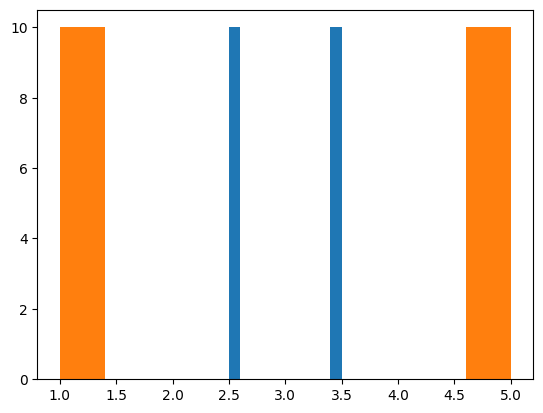

In [71]:
#Mostrando em gráfico que são filmes diferentes com a mesma média e mediana
plt.hist(filme1)
plt.hist(filme2)
plt.show()

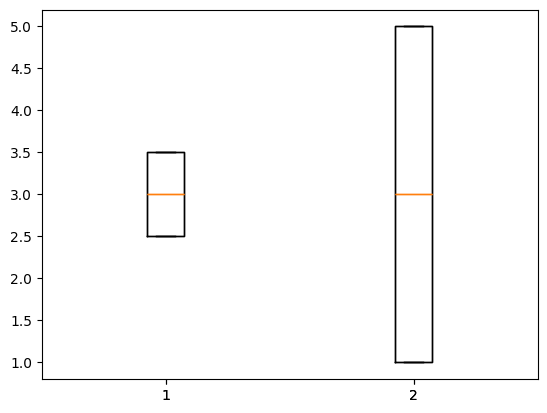

In [72]:
plt.boxplot([filme1,filme2])
plt.boxplot([filme1,filme2])
plt.show()

In [76]:
filme0 = np.mean([3.0] * 20) # Desvio nesse caso é 0. Em filme1 é baixo e em filme2 há um grande desvio
#Desvio padrão
np.std(filme0), np.std(filme1), np.std(filme2)

(0.0, 0.5, 2.0)

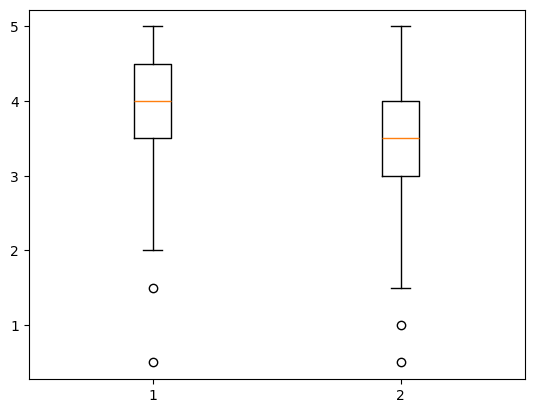

In [79]:
plt.boxplot([notas_toy_story, notas_jumanji])
plt.show()

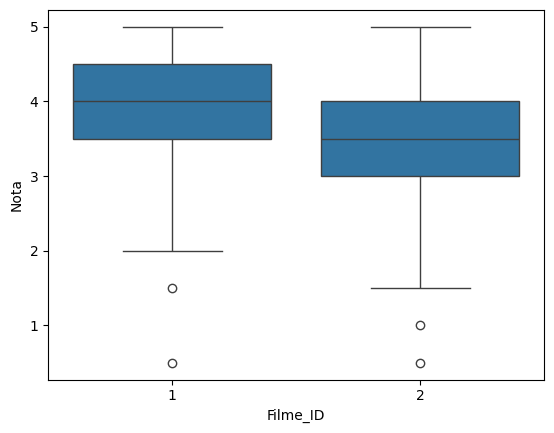

In [94]:
sns.boxplot(data=notas.query("Filme_ID in [1,2]"), x="Filme_ID", y="Nota")
plt.show()

<ipython-input-98-d385444d2b60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("Filme_ID in [1,2]"), x="Filme_ID", y="Nota", palette="Set3") # Use a color palette


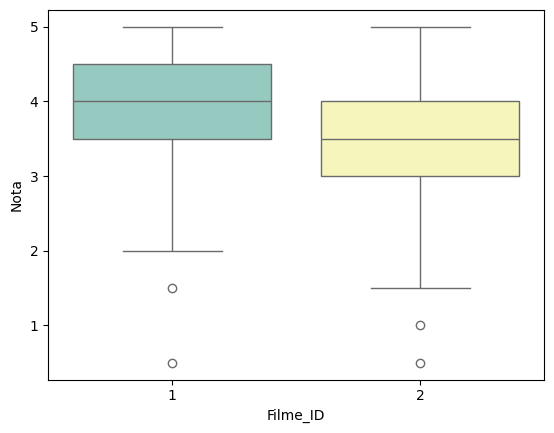

In [98]:
# prompt: mesmo gráfico boxplot que o anterior, porém com cores
sns.boxplot(data=notas.query("Filme_ID in [1,2]"), x="Filme_ID", y="Nota", palette="Set3") # Use a color palette
plt.show()

In [91]:
notas.groupby("Filme_ID").count()

,User_ID,Nota,Momento
Filme_ID,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [93]:
notas.groupby("Filme_ID").count().query("Nota == 1") #Filmes que só tem uma nota. Não faz sentido trabalhar com esses filmes.

,User_ID,Nota,Momento
Filme_ID,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


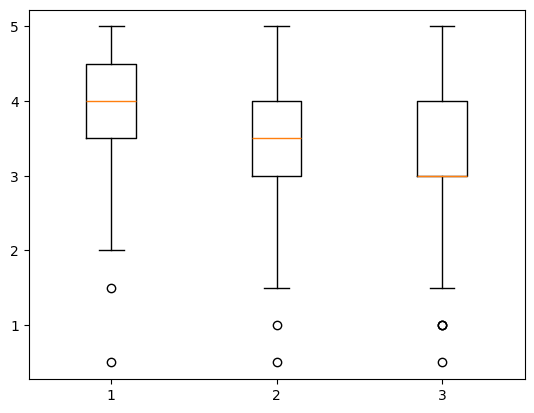

<ipython-input-105-645ac58d4dbf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("Filme_ID in [1,2,3]"), x="Filme_ID", y="Nota", palette="Set2")


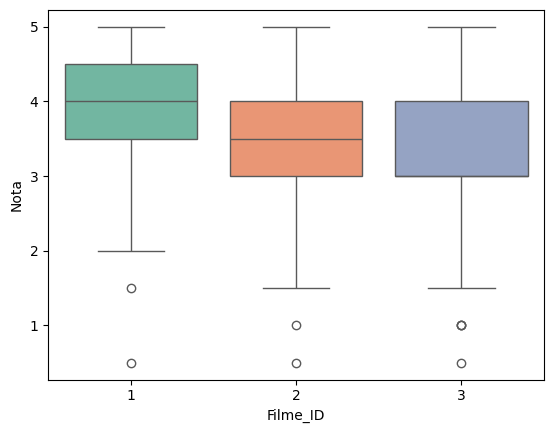

In [105]:
#tarefinha da aula - como podemos fazer um boxplot com as notas do Toy Story, do Jumanji e Grumpier Old Men, utilizando o Seaborn e o Matplotlib?
notas_do_grumpier_old_men = notas.query("Filme_ID==3")["Nota"]

# Boxplot com Matplotlib
plt.boxplot([notas_toy_story, notas_jumanji, notas_do_grumpier_old_men])
plt.show()

# Boxplot com Seaborn
sns.boxplot(data=notas.query("Filme_ID in [1,2,3]"), x="Filme_ID", y="Nota", palette="Set2")
plt.show()